stroke預測

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_curve,roc_auc_score,auc

In [43]:
df = pd.read_csv(r'C:\Users\linnn\Desktop\專題\diabetes_data.csv')

tem = df['Stroke']                          #先將我們要的Stroke結果移到最後一個欄位，方便之後資料分集用
df = df.drop(['Stroke'],axis=1)
df = df.merge(tem,left_index=True,right_index=True)

pd.set_option('display.max_columns',None)      #列出所有資料欄位
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,0.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


資料探索

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  HighBP             

In [45]:
#確認各欄位有無NA值
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
HighBP                  0
Diabetes                0
Stroke                  0
dtype: int64

In [46]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'HighBP', 'Diabetes', 'Stroke'],
      dtype='object')

In [47]:
unique_vals = []
for i in df.columns:
    unival = df[i].nunique()     #nunique()用來獲取唯一的統計次數
    unique_vals.append(unival)

pd.DataFrame(unique_vals,columns=['Unique_values_num'],index=df.columns)

,Unique_values_num
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [48]:
cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke']

print(cols)

['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Diabetes', 'Hypertension', 'Stroke']


KeyError: 'Hypertension'

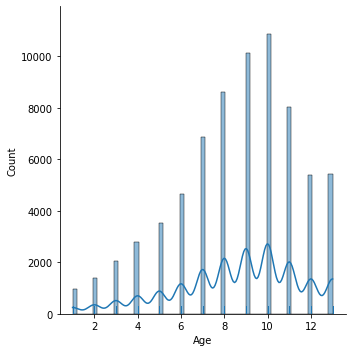

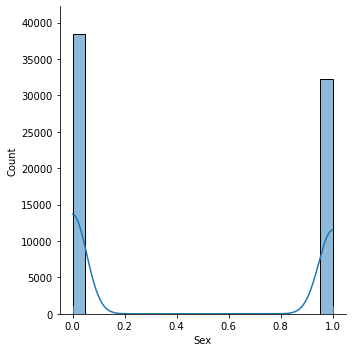

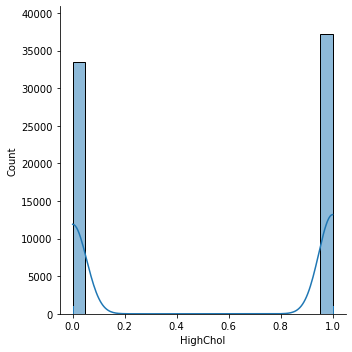

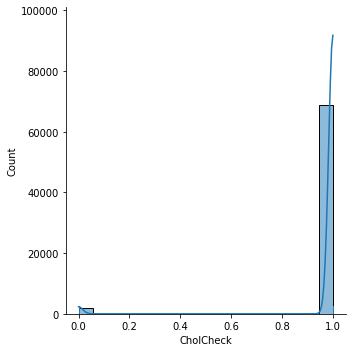

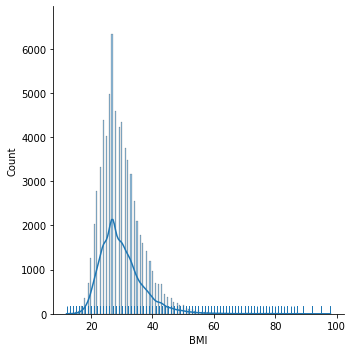

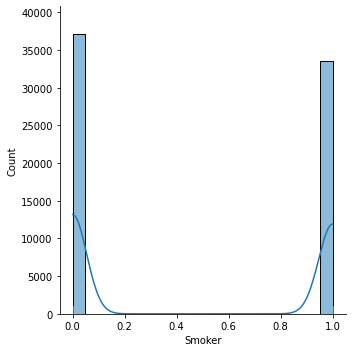

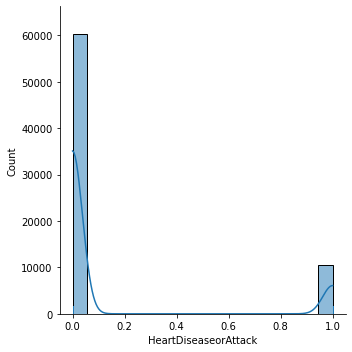

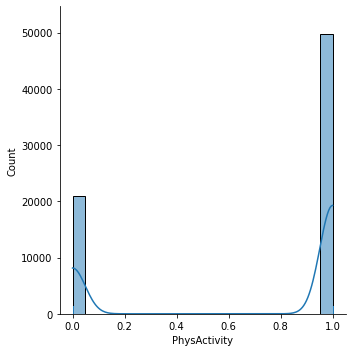

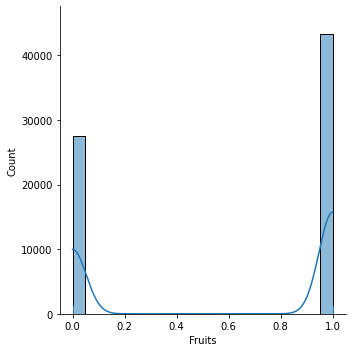

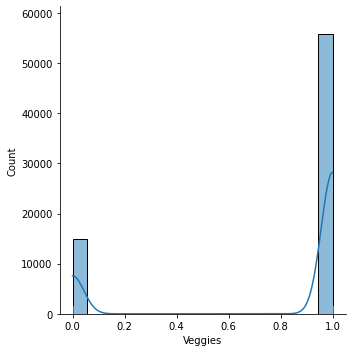

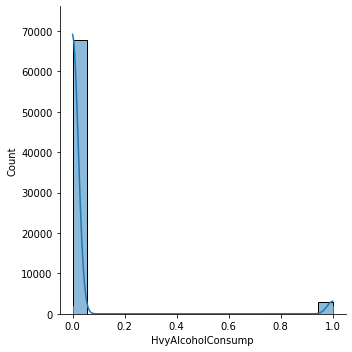

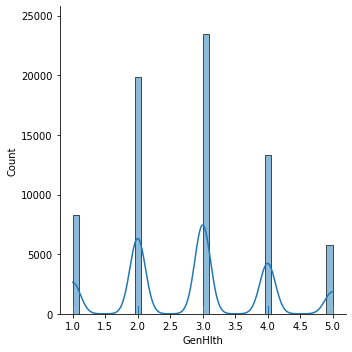

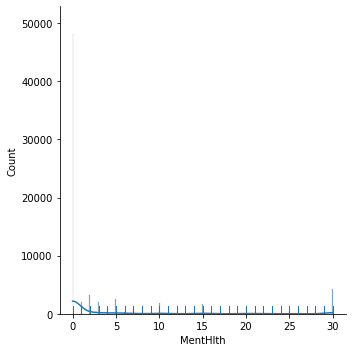

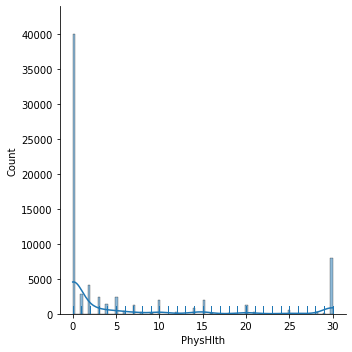

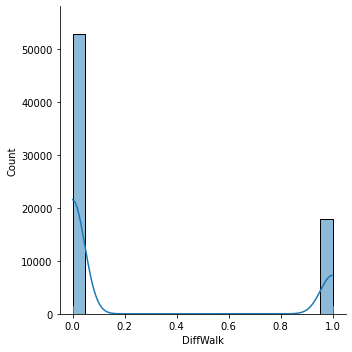

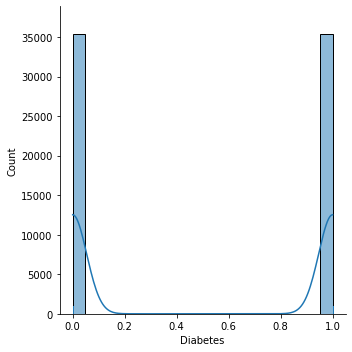

In [49]:
for i in cols:
    sns.displot(df[i],kde=True,rug=True)

由上面圖表可以得知，CholCheck 和 HvyAlcoholConsump 極為不均衡且分布嚴重偏斜，可能導致模型有更大偏差，所以等等不考慮此兩個變數

<AxesSubplot:>

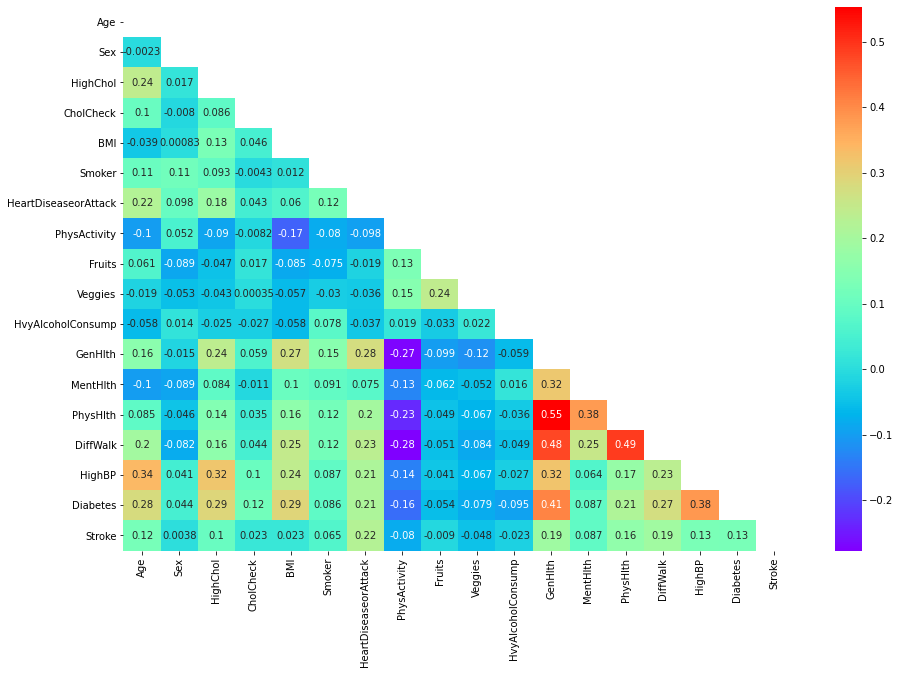

In [50]:
plt.figure(figsize=(15,10))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='rainbow')      #顏色越深。數值越大

清資料，將和stroke相關係數太小的欄位刪除

In [51]:
data = df.drop(['Sex','CholCheck','BMI','Smoker','PhysActivity','Fruits', 'Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data

,Age,HighChol,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes,Stroke
0,4.0,0.0,0.0,3.0,30.0,0.0,1.0,0.0,0.0
1,12.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
2,13.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0
4,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70687,6.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
70688,10.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
70689,13.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,1.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0


In [52]:
X = data.drop('Stroke',axis=1)
y = data['Stroke']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56553, 8)
(14139, 8)
(56553,)
(14139,)


Feature scaling 特徵縮放:

縮放數據以便相對較大的值不會使模型有偏差

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
X_train_scaled

array([[ 0.1478883 ,  0.95234791,  2.42072264, ...,  1.72135684,
         0.88103226, -0.99514907],
       [ 0.84879149, -1.05003643, -0.41309978, ...,  1.72135684,
         0.88103226,  1.00487458],
       [-2.65572444, -1.05003643, -0.41309978, ..., -0.58093707,
        -1.13503222, -0.99514907],
       ...,
       [ 0.84879149,  0.95234791, -0.41309978, ..., -0.58093707,
        -1.13503222,  1.00487458],
       [ 1.19924308,  0.95234791, -0.41309978, ..., -0.58093707,
         0.88103226,  1.00487458],
       [-0.55301488, -1.05003643, -0.41309978, ..., -0.58093707,
         0.88103226,  1.00487458]])

In [56]:
y_train

806      0.0
63025    0.0
5820     0.0
47297    0.0
1276     0.0
        ... 
21243    0.0
45891    0.0
42613    0.0
43567    0.0
68268    0.0
Name: Stroke, Length: 56553, dtype: float64

In [57]:
accuracy_model = pd.DataFrame(columns=['Model','accuracy'])
accuracy_model

,Model,accuracy


In [58]:
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,X_test_scaled,y_test)

Logistic Regression

c:\Users\linnn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linnn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linnn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linnn\anaconda3\lib\site-packages\sklearn\util

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     13218
         1.0       0.00      0.00      0.00       921

    accuracy                           0.93     14139
   macro avg       0.47      0.50      0.48     14139
weighted avg       0.87      0.93      0.90     14139



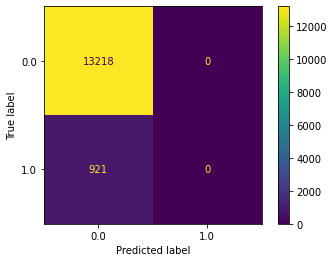

In [59]:
log = LogisticRegression()
model_train_test(log)

GAUSSIAN NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     13218
         1.0       0.20      0.47      0.28       921

    accuracy                           0.84     14139
   macro avg       0.58      0.67      0.60     14139
weighted avg       0.91      0.84      0.87     14139



c:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


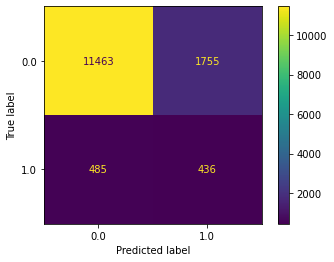

In [61]:
gnb = GaussianNB()
model_train_test(gnb)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     13218
         1.0       0.24      0.32      0.27       921

    accuracy                           0.89     14139
   macro avg       0.59      0.62      0.61     14139
weighted avg       0.90      0.89      0.90     14139



c:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


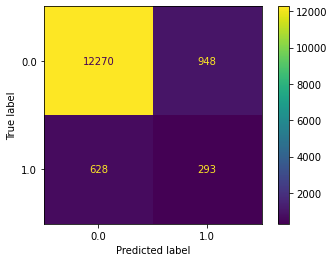

In [62]:
bnb = BernoulliNB()
model_train_test(bnb)

TP = 11463

FP = 485

FN = 1755

TN = 436

type 1 error = 1755

type 2 error = 485

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     13218
         1.0       0.28      0.06      0.10       921

    accuracy                           0.93     14139
   macro avg       0.61      0.52      0.53     14139
weighted avg       0.90      0.93      0.91     14139



c:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


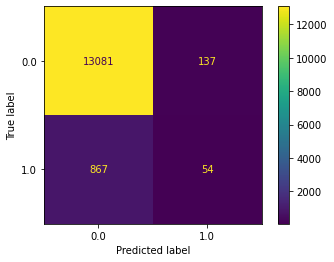

In [63]:
knn = KNeighborsClassifier()
model_train_test(knn)

In [65]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 19 candidates, totalling 190 fits
{'n_neighbors': 18}
Accuracy for our training dataset with tuning is : 93.84%


Decision tree

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     13218
         1.0       0.14      0.04      0.06       921

    accuracy                           0.92     14139
   macro avg       0.54      0.51      0.51     14139
weighted avg       0.88      0.92      0.90     14139



c:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


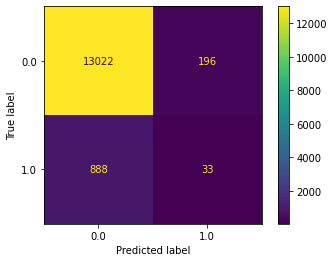

In [64]:
tree = DecisionTreeClassifier()
model_train_test(tree)